In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
# Import Dataset
pizza = pd.read_csv("pizza_sales.csv")
pizza.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,01-01-2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,01-01-2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,01-01-2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,01-01-2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,01-01-2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


# Data Cleaning

In [3]:
# No Null Values
pizza.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pizza_id           48620 non-null  int64  
 1   order_id           48620 non-null  int64  
 2   pizza_name_id      48620 non-null  object 
 3   quantity           48620 non-null  int64  
 4   order_date         48620 non-null  object 
 5   order_time         48620 non-null  object 
 6   unit_price         48620 non-null  float64
 7   total_price        48620 non-null  float64
 8   pizza_size         48620 non-null  object 
 9   pizza_category     48620 non-null  object 
 10  pizza_ingredients  48620 non-null  object 
 11  pizza_name         48620 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 4.5+ MB


In [4]:
# No Duplicates
pizza.duplicated(keep = False).sum()

0

In [5]:
# Data Type Conversion
pizza["order_date"].dtype

dtype('O')

In [6]:
pizza["order_date"] = pd.to_datetime(pizza["order_date"])

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_7548\3620063528.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  pizza["order_date"] = pd.to_datetime(pizza["order_date"])


In [7]:
pizza["order_date"].dtype

dtype('<M8[ns]')

In [8]:
pizza["order_time"] = pd.to_datetime(pizza["order_time"])

In [9]:
pizza["order_time"].dtype

dtype('<M8[ns]')

In [10]:
pizza.dtypes

pizza_id                      int64
order_id                      int64
pizza_name_id                object
quantity                      int64
order_date           datetime64[ns]
order_time           datetime64[ns]
unit_price                  float64
total_price                 float64
pizza_size                   object
pizza_category               object
pizza_ingredients            object
pizza_name                   object
dtype: object

# Data Exploration

In [11]:
# Total Revenue from Pizza Sales:
total_revenue = pizza["total_price"].sum()
total_revenue

817860.05

In [12]:
# Calculate the average order Value
total_order_qty= pizza["order_id"].nunique()
total_order_qty

21350

In [13]:
avg_order_value = total_revenue / total_order_qty
avg_order_value

38.30726229508197

In [14]:
# Calculate Total Pizzas sold
total_qty = pizza["quantity"].sum()
total_qty

49574

In [15]:
# Calculate Total Orders
total_order_qty

21350

In [16]:
# Calculate Average Pizza per order
total_qty / total_order_qty 

2.321967213114754

In [17]:
# Calculate Daily trend for Total orders

In [18]:
pizza["order_date"]

0       2015-01-01
1       2015-01-01
2       2015-01-01
3       2015-01-01
4       2015-01-01
           ...    
48615   2015-12-31
48616   2015-12-31
48617   2015-12-31
48618   2015-12-31
48619   2015-12-31
Name: order_date, Length: 48620, dtype: datetime64[ns]

In [19]:
pizza["weekday"] = pizza["order_date"].dt.day_name()

In [20]:
pizza.head(3)

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,weekday
0,1,1,hawaiian_m,1,2015-01-01,2023-12-17 11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,Thursday
1,2,2,classic_dlx_m,1,2015-01-01,2023-12-17 11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,Thursday
2,3,2,five_cheese_l,1,2015-01-01,2023-12-17 11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza,Thursday


In [51]:
gb_weekday = pizza.groupby(["weekday"]).agg({"order_id":"nunique"}).sort_values(by="order_id", ascending = False)
gb_weekday.rename(columns = {"order_id" : "Order_Count"}, inplace = True)
gb_weekday

,Order_Count
weekday,
Friday,3359
Thursday,3173
Saturday,3126
Wednesday,3064
Tuesday,2978
Monday,2940
Sunday,2710


In [158]:
# Peak day of the week by total quantity and total Order amount:
b = pizza.groupby(["weekday"]).agg({"order_id":"nunique", "quantity" : "sum", "total_price" : "sum"})
b.rename(columns = {"order_id" : "Order_Count", "total_price" : "Sales_Amt"}, inplace = True)
b.sort_values(by = ["Order_Count", "quantity"], ascending = [False, False])

,Order_Count,quantity,Sales_Amt
weekday,,,
Friday,3359,7859,129690.90
Thursday,3173,7387,121650.30
Saturday,3126,7408,121605.15
Wednesday,3064,7058,116731.20
Tuesday,2978,6981,115594.45
Monday,2940,6684,110471.60
Sunday,2710,6197,102116.45


In [ ]:
b.pivot(index= "weekday", columns="")

In [56]:
b["quantity"].sum() == total_qty

True

In [57]:
b["Order_Count"].sum() == total_order_qty

True

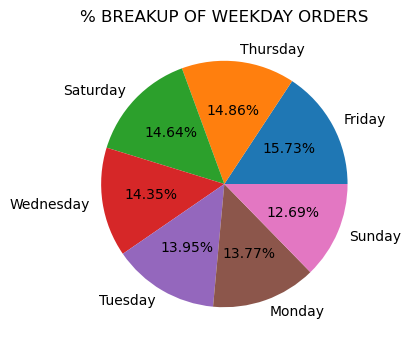

In [22]:
plt.figure(figsize=(5,4))
plt.title("% BREAKUP OF WEEKDAY ORDERS")
plt.pie(x = gb_weekday["order_id"], labels = gb_weekday.index, autopct= "%1.2f%%")
plt.show()

In [23]:
# Hourly Trend for Total Order

In [24]:
pizza["hour"] = pizza["order_time"].dt.hour

In [25]:
pizza.head(3)

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,weekday,hour
0,1,1,hawaiian_m,1,2015-01-01,2023-12-17 11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,Thursday,11
1,2,2,classic_dlx_m,1,2015-01-01,2023-12-17 11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,Thursday,11
2,3,2,five_cheese_l,1,2015-01-01,2023-12-17 11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza,Thursday,11


In [26]:
gb_hours = pizza.groupby("hour", as_index = False).agg({"order_id" : "nunique"})
gb_hours.rename(columns={"order_id" : "Order_Count"}, inplace=True)
gb_hours.sort_values(by = "hour", ascending = True)

,hour,Order_Count
0,9,1
1,10,8
2,11,1231
3,12,2520
4,13,2455
5,14,1472
6,15,1468
7,16,1920
8,17,2336
9,18,2399


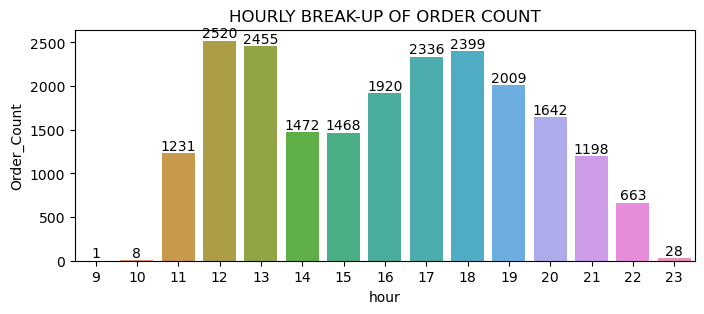

In [27]:
plt.figure(figsize=(8,3))
plt.title("HOURLY BREAK-UP OF ORDER COUNT")
ax = sns.barplot(data=gb_hours, x = gb_hours["hour"], y = "Order_Count")
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

In [28]:
# Sales by Pizza Category
Sale_byCategory = pizza.groupby("pizza_category", as_index = False).agg({"total_price" : "sum"})
Sale_byCategory.rename(columns={"total_price" : "Sales_Amt"}, inplace=True)
Sale_byCategory.sort_values(by = "Sales_Amt", ascending = False)

,pizza_category,Sales_Amt
1,Classic,220053.10
2,Supreme,208197.00
0,Chicken,195919.50
3,Veggie,193690.45


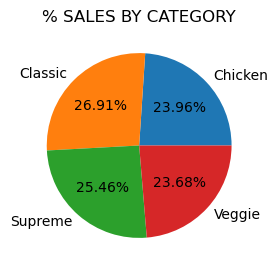

In [148]:
plt.figure(figsize=(6,3))
plt.title("% SALES BY CATEGORY")
plt.pie(Sale_byCategory["Sales_Amt"], labels = Sale_byCategory["pizza_category"], autopct="%1.2f%%")
plt.show()

In [143]:
Sale_byCategory["Sales_Amt"].sum()

817860.05

In [144]:
pizza["total_price"].sum()

817860.05

In [44]:
# Pizza Category having highest average price per unit
a = pizza.groupby("pizza_category", as_index = False).agg({"total_price" : "mean"})
a.rename(columns={"total_price" : "Sales_Amt"}, inplace=True)
a.sort_values(by = "Sales_Amt", ascending = False)

,pizza_category,Sales_Amt
0,Chicken,18.115534
2,Supreme,17.678271
3,Veggie,16.917674
1,Classic,15.093840


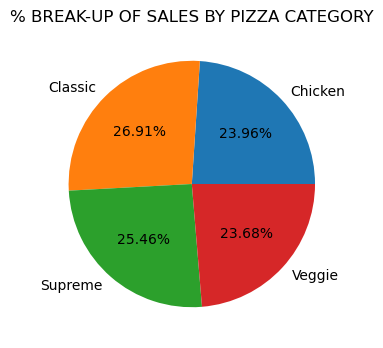

In [29]:
plt.figure(figsize=(5,4))
plt.title("% BREAK-UP OF SALES BY PIZZA CATEGORY")
plt.pie(Sale_byCategory["Sales_Amt"], labels = Sale_byCategory["pizza_category"], autopct="%1.2f%%")
plt.show()

# Analyzing the chicken pizza category determine amongst total 6 products which pizza generated the highest sales 

In [80]:
pizza_cat_chicken = pizza[pizza["pizza_category"] == "Chicken"]
pizza_cat_chicken.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,weekday,hour,month
5,6,2,thai_ckn_l,1,2015-01-01,2023-12-17 11:57:40,20.75,20.75,L,Chicken,"Chicken, Pineapple, Tomatoes, Red Peppers, Tha...",The Thai Chicken Pizza,Thursday,11,January
10,11,6,bbq_ckn_s,1,2015-01-01,2023-12-17 12:29:36,12.75,12.75,S,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",The Barbecue Chicken Pizza,Thursday,12,January
24,25,10,southw_ckn_l,1,2015-01-01,2023-12-17 13:00:15,20.75,20.75,L,Chicken,"Chicken, Tomatoes, Red Peppers, Red Onions, Ja...",The Southwest Chicken Pizza,Thursday,13,January
25,26,11,bbq_ckn_l,1,2015-01-01,2023-12-17 13:02:59,20.75,20.75,L,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",The Barbecue Chicken Pizza,Thursday,13,January
26,27,11,cali_ckn_l,1,2015-01-01,2023-12-17 13:02:59,20.75,20.75,L,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ...",The California Chicken Pizza,Thursday,13,January


In [105]:
gb_chicken_sales = pizza_cat_chicken.groupby("pizza_name", as_index = False).agg({"total_price" : "sum"}).sort_values(
    by="total_price", ascending = False)
gb_chicken_sales.rename(columns = {"total_price" : "Sales_Amt"}, inplace = True)
gb_chicken_sales

,pizza_name,Sales_Amt
5,The Thai Chicken Pizza,43434.25
0,The Barbecue Chicken Pizza,42768.00
1,The California Chicken Pizza,41409.50
4,The Southwest Chicken Pizza,34705.75
2,The Chicken Alfredo Pizza,16900.25
3,The Chicken Pesto Pizza,16701.75


In [95]:
pizza_cat_chicken["pizza_name"].nunique()

6

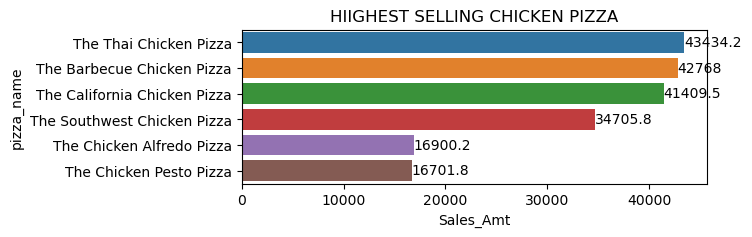

In [102]:
plt.figure(figsize=(6,2))
plt.title("HIIGHEST SELLING CHICKEN PIZZA")
ax = sns.barplot(data=gb_chicken_sales, x = gb_chicken_sales["Sales_Amt"], y = gb_chicken_sales["pizza_name"])
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

In [30]:
# Sales by Pizza Category for January month
pizza["month"] = pizza["order_date"].dt.month_name()

In [31]:
pizza.head(3)

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,weekday,hour,month
0,1,1,hawaiian_m,1,2015-01-01,2023-12-17 11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,Thursday,11,January
1,2,2,classic_dlx_m,1,2015-01-01,2023-12-17 11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,Thursday,11,January
2,3,2,five_cheese_l,1,2015-01-01,2023-12-17 11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza,Thursday,11,January


In [32]:
Monthly_Saleby_Category = pizza.groupby(["pizza_category", "month"], as_index = False).agg({"total_price" : "sum"}).sort_index()
Monthly_Saleby_Category.rename(columns={"total_price":"Sales_Amt"}, inplace = True)
Monthly_Saleby_Category

,pizza_category,month,Sales_Amt
0,Chicken,April,17113.50
1,Chicken,August,16579.50
2,Chicken,December,14535.25
3,Chicken,February,16273.25
4,Chicken,January,16696.25
5,Chicken,July,16699.50
6,Chicken,June,16212.50
7,Chicken,March,17055.75
8,Chicken,May,16174.25
9,Chicken,November,16472.25


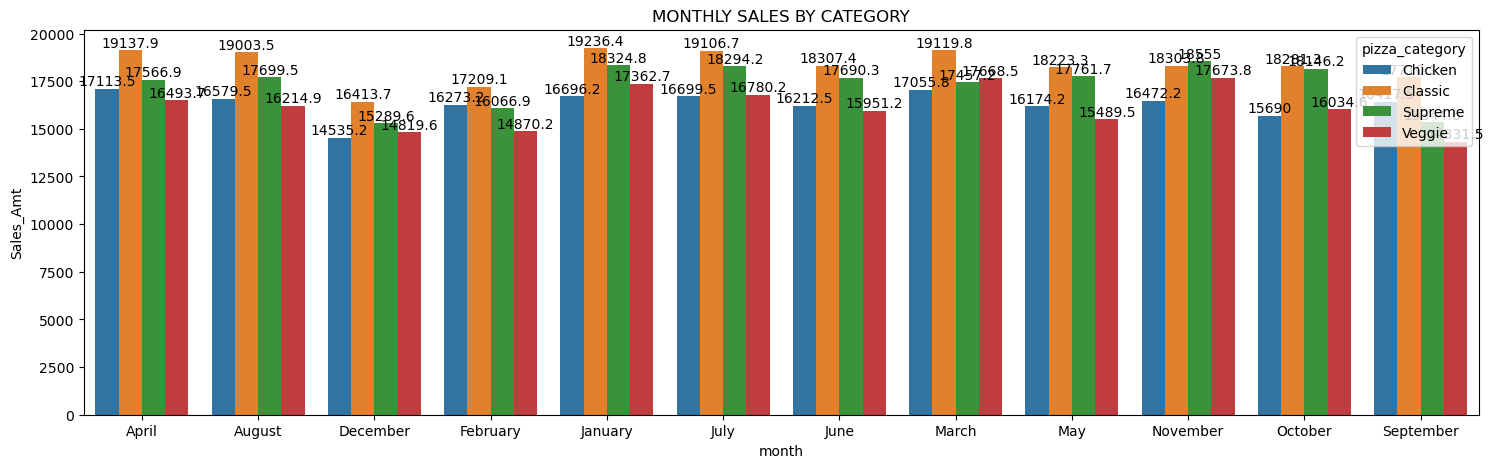

In [33]:
plt.figure(figsize=(18,5))
plt.title("MONTHLY SALES BY CATEGORY")
ax = sns.barplot(data=Monthly_Saleby_Category, y= Monthly_Saleby_Category["Sales_Amt"], x= Monthly_Saleby_Category["month"], 
                hue = Monthly_Saleby_Category["pizza_category"])
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

In [124]:
gb_monthlySale = pizza.groupby("month", as_index = False).agg({"total_price" : "sum"}).sort_values(by="total_price", 
                                                                                                   ascending = False)
gb_monthlySale

,month,total_price
4,January,71620.15
7,March,71301.40
9,November,71004.85
5,July,70880.65
0,April,70312.00
1,August,69497.30
6,June,68161.45
10,October,68152.20
8,May,67648.80
3,February,64419.45


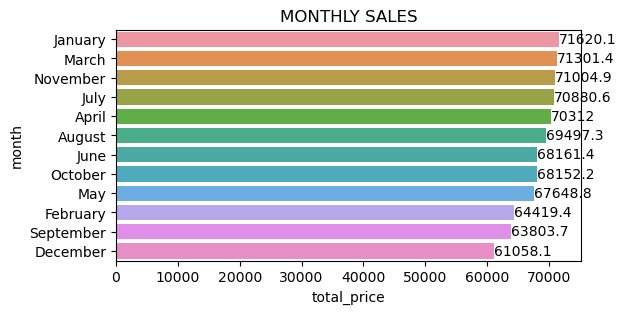

In [123]:
plt.figure(figsize=(6,3))
plt.title("MONTHLY SALES")
ax = sns.barplot(gb_monthlySale, x = gb_monthlySale["total_price"], y = gb_monthlySale["month"])
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

In [34]:
# Sales by Pizza Size 
Sale_bySize = pizza.groupby("pizza_size", as_index = False).agg({"total_price" : "sum"})
Sale_bySize.rename(columns={"total_price" : "Sale_Amt"}, inplace=True)
Sale_bySize

,pizza_size,Sale_Amt
0,L,375318.70
1,M,249382.25
2,S,178076.50
3,XL,14076.00
4,XXL,1006.60


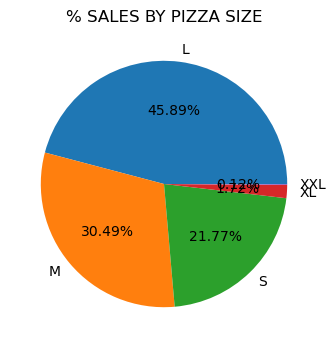

In [35]:
plt.figure(figsize=(5,4))
plt.title("% SALES BY PIZZA SIZE")
plt.pie(Sale_bySize["Sale_Amt"], labels=Sale_bySize["pizza_size"], autopct="%1.2f%%")
plt.show()

In [36]:
# Total pizza qty sold by category
Qty_byCategory = pizza.groupby("pizza_category", as_index=False).agg({"quantity" : "sum"}).sort_values(by="quantity", ascending = False)
Qty_byCategory

,pizza_category,quantity
1,Classic,14888
2,Supreme,11987
3,Veggie,11649
0,Chicken,11050


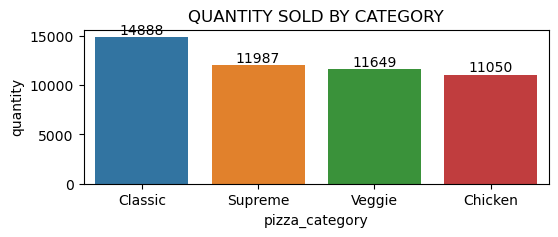

In [37]:
plt.figure(figsize=(6,2))
plt.title("QUANTITY SOLD BY CATEGORY")
ax = sns.barplot(Qty_byCategory, y = Qty_byCategory["quantity"], x = Qty_byCategory["pizza_category"])
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

In [38]:
# Top 5 Best sellers by Total Pizzas sold
best_seller = pizza.groupby("pizza_name", as_index= False).agg({"quantity" : "sum"}).sort_values(by = "quantity", ascending = False).head(5)
best_seller

,pizza_name,quantity
7,The Classic Deluxe Pizza,2453
0,The Barbecue Chicken Pizza,2432
12,The Hawaiian Pizza,2422
20,The Pepperoni Pizza,2418
30,The Thai Chicken Pizza,2371


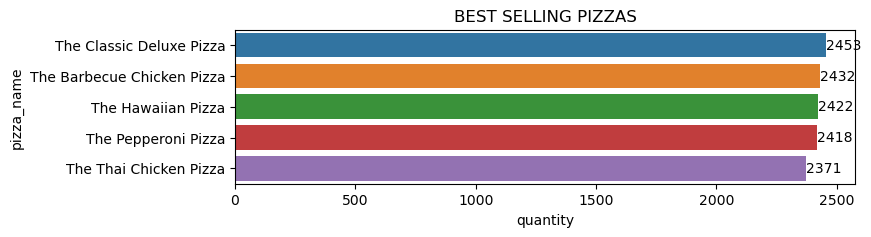

In [39]:
plt.figure(figsize=(8,2))
plt.title("BEST SELLING PIZZAS")
ax = sns.barplot(best_seller, x = best_seller["quantity"], y = best_seller["pizza_name"])
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

In [40]:
# Bottom 5 Worst sellers by Total Pizzas sold
worst_selling = pizza.groupby("pizza_name", as_index = False).agg({"quantity" : "sum"}).sort_values(by = "quantity", ascending = True).head(5)
worst_selling

,pizza_name,quantity
2,The Brie Carre Pizza,490
16,The Mediterranean Pizza,934
3,The Calabrese Pizza,937
28,The Spinach Supreme Pizza,950
24,The Soppressata Pizza,961


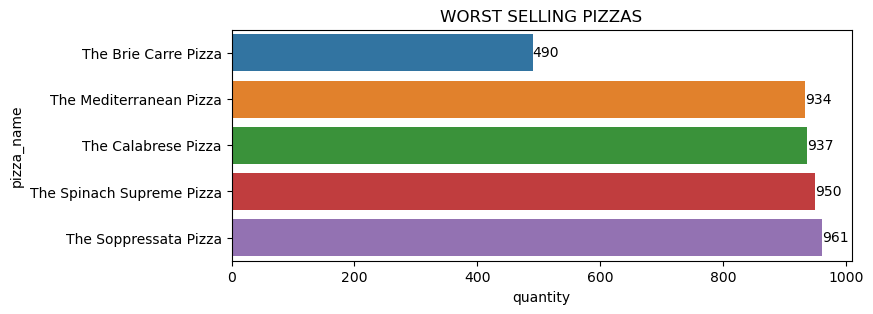

In [41]:
plt.figure(figsize=(8,3))
plt.title("WORST SELLING PIZZAS")
ax = sns.barplot(worst_selling, x = worst_selling["quantity"], y = worst_selling["pizza_name"])
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

In [42]:
# Bottom 5 Worst sellers by Total Pizzas sold in the month of January
Jan_data = pizza[pizza["month"] == "January"]
Jan_data

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,weekday,hour,month
0,1,1,hawaiian_m,1,2015-01-01,2023-12-17 11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,Thursday,11,January
1,2,2,classic_dlx_m,1,2015-01-01,2023-12-17 11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,Thursday,11,January
2,3,2,five_cheese_l,1,2015-01-01,2023-12-17 11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza,Thursday,11,January
3,4,2,ital_supr_l,1,2015-01-01,2023-12-17 11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza,Thursday,11,January
4,5,2,mexicana_m,1,2015-01-01,2023-12-17 11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,Thursday,11,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44885,44886,19729,ital_supr_l,1,2015-01-12,2023-12-17 21:15:17,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza,Monday,21,January
44886,44887,19730,pep_msh_pep_s,1,2015-01-12,2023-12-17 21:40:34,11.00,11.00,S,Classic,"Pepperoni, Mushrooms, Green Peppers","The Pepperoni, Mushroom, and Peppers Pizza",Monday,21,January
44887,44888,19730,thai_ckn_l,1,2015-01-12,2023-12-17 21:40:34,20.75,20.75,L,Chicken,"Chicken, Pineapple, Tomatoes, Red Peppers, Tha...",The Thai Chicken Pizza,Monday,21,January
44888,44889,19730,the_greek_s,1,2015-01-12,2023-12-17 21:40:34,12.00,12.00,S,Classic,"Kalamata Olives, Feta Cheese, Tomatoes, Garlic...",The Greek Pizza,Monday,21,January


In [43]:
Jan_data.groupby("pizza_name").agg({"quantity" : "sum"}).sort_values(by = "quantity").head(5)

,quantity
pizza_name,
The Brie Carre Pizza,34
The Chicken Alfredo Pizza,72
The Mediterranean Pizza,74
The Chicken Pesto Pizza,77
The Soppressata Pizza,79


In [129]:
gb_pizza_catnsize = pizza.groupby(["pizza_category", "pizza_size"], as_index = False).agg({"total_price" : "sum"})
gb_pizza_catnsize

,pizza_category,pizza_size,total_price
0,Chicken,L,102339.00
1,Chicken,M,65224.50
2,Chicken,S,28356.00
3,Classic,L,74518.50
4,Classic,M,60581.75
5,Classic,S,69870.25
6,Classic,XL,14076.00
7,Classic,XXL,1006.60
8,Supreme,L,94258.50
9,Supreme,M,66475.00


In [141]:
gb_pizza_catnsize.pivot(index = "pizza_size", columns="pizza_category", values="total_price")

pizza_category,Chicken,Classic,Supreme,Veggie
pizza_size,,,,
L,102339.0,74518.50,94258.5,104202.70
M,65224.5,60581.75,66475.0,57101.00
S,28356.0,69870.25,47463.5,32386.75
XL,NaN,14076.00,NaN,NaN
XXL,NaN,1006.60,NaN,NaN


In [168]:
# Which category of pizza generated the highest sales and has the most expensive average price per unit?
pizza.groupby("pizza_category").agg({"total_price" : "sum", "unit_price" : "mean"}).sort_values(by="unit_price", 
                                                                                                ascending = False)

,total_price,unit_price
pizza_category,,
Chicken,195919.50,17.709408
Supreme,208197.00,17.363229
Veggie,193690.45,16.612639
Classic,220053.10,14.797490


In [165]:
pizza.columns

Index(['pizza_id', 'order_id', 'pizza_name_id', 'quantity', 'order_date',
       'order_time', 'unit_price', 'total_price', 'pizza_size',
       'pizza_category', 'pizza_ingredients', 'pizza_name', 'weekday', 'hour',
       'month'],
      dtype='object')